In [1]:
import pandas as pd
import  numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/arshid/iris-flower-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kirthanamohanr
Your Kaggle Key: ········


100%|██████████| 0.99k/0.99k [00:00<00:00, 93.5kB/s]

In [5]:
df=pd.read_csv('IRIS.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# FINDING THE COUNTS OF EACH CLASS - SETOSA ,VERSICOLOR, VIRGINICA

In [8]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

# DATA PREPROCESSING

In [9]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# HISTOGRAMS


Text(0.5, 1.0, 'Sepal Length')

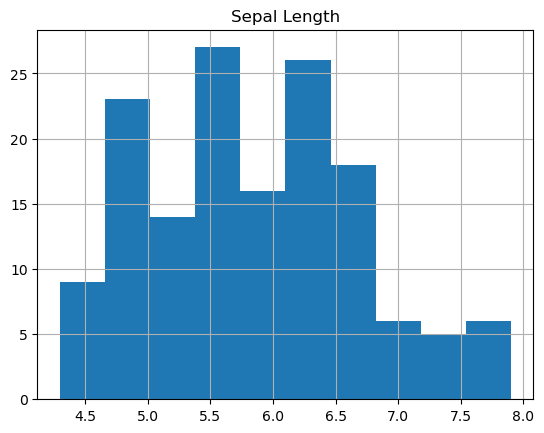

In [11]:
df['sepal_length'].hist()
plt.title('Sepal Length')

Text(0.5, 1.0, 'Sepal Width')

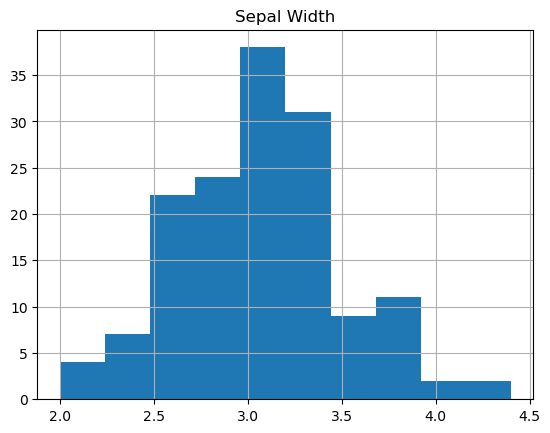

In [12]:
df['sepal_width'].hist()
plt.title('Sepal Width')

Text(0.5, 1.0, 'Petal Length')

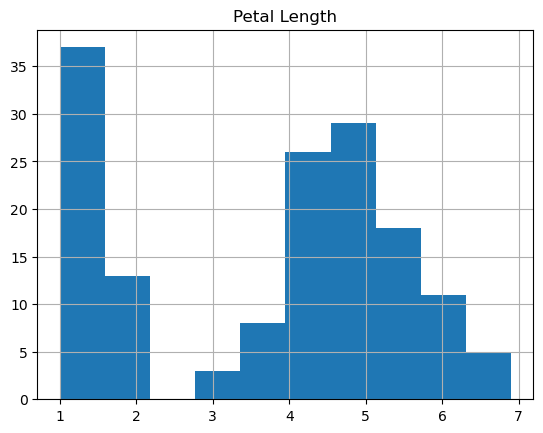

In [13]:
df['petal_length'].hist()
plt.title('Petal Length')

Text(0.5, 1.0, 'Petal Width')

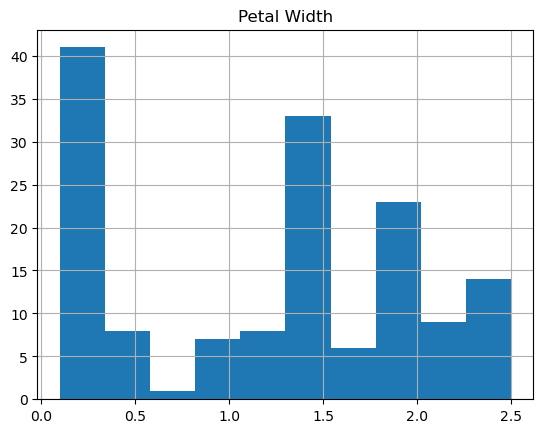

In [14]:
df['petal_width'].hist()
plt.title('Petal Width')

# SCATTERPLOT 

In [20]:
colors=['blue','black','yellow']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']

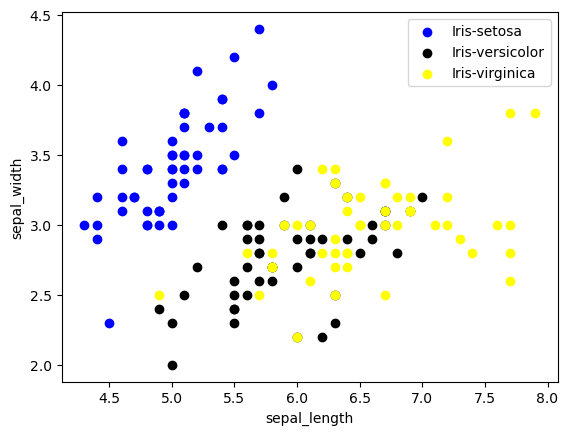

In [21]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

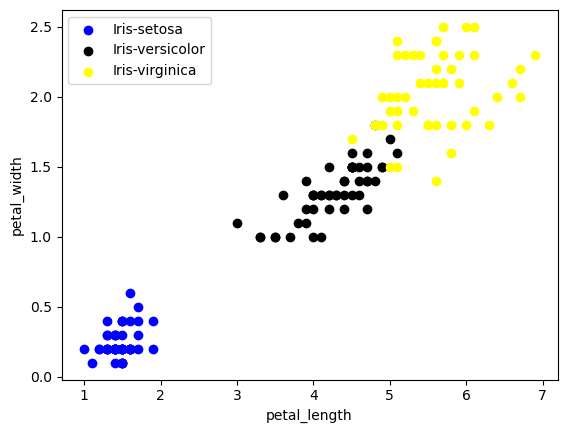

In [22]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

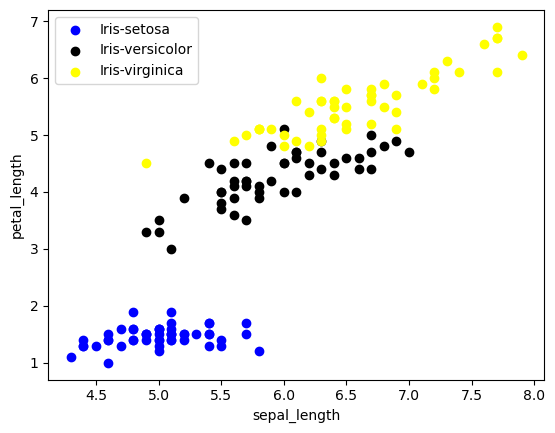

In [23]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend()

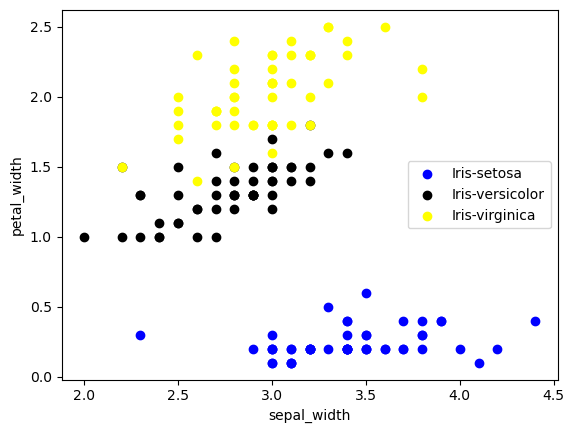

In [24]:
for i in range(3):
    x=df[df['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.legend()

# CORRELATION MATRIX

In [25]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

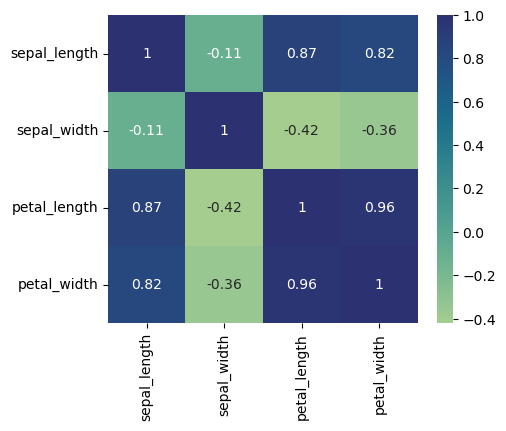

In [26]:
corr=df.corr()
fig, ax=plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='crest')

# LABEL ENCODING

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [28]:
df['species']=le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


MODEL TRAINING

In [29]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['species'])
Y=df['species']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30)

# LOGISTIC REGRESSION

In [36]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs', max_iter=1000)

In [37]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [38]:
print('Accuracy',model.score(X_test,Y_test)*100)

Accuracy 100.0


# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [40]:
model.fit(X_train,Y_train)

KNeighborsClassifier()

In [41]:
print('Accuracy',model.score(X_test,Y_test)*100)

Accuracy 95.55555555555556


C:\Users\kirth\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# DECISION TREE CLASSIFICATION

In [42]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [43]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [44]:
print('Accuracy',model.score(X_test,Y_test)*100)

Accuracy 97.77777777777777
